In [4]:
#Loading the libraries
#!pip install matplotlib.backends.backend_pdf
import pandas as pd     #For general purpose Data Manipulation
import numpy as np  #For some operations - creating vectors and matrices/log transformation
from matplotlib.backends.backend_pdf import PdfPages #Plotting Box-Whisker
from matplotlib import pyplot as plt #Plotting Box-Whisker --> Outlier Detection
import seaborn as sns  #Plotting Box-Whisker and others
from sklearn.model_selection import train_test_split  #For Building Train and Test Set
from sklearn.linear_model import LinearRegression    #For Regression Analysis

In [5]:
#Importing the Data
car_sales = pd.read_csv('Car_sales.csv')

In [6]:
#Checking the Data
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [4]:
#Displaying first 10 records of the dataset
car_sales.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,08-09-2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,04-04-2011,83.998724


In [5]:
#Displaying basic statistics of each attribute of the dataset
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
!pip install pandas_profiling

In [7]:
#For getting detailed report about the data - whether any missing value etc. 
import pandas_profiling as pd_prof

pd_prof.ProfileReport(car_sales)

C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.sta

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [8]:
# Checking the data types of the Dataset
dict(car_sales.dtypes)

{'Manufacturer': dtype('O'),
 'Model': dtype('O'),
 'Sales_in_thousands': dtype('float64'),
 'four_year_resale_value': dtype('float64'),
 'Vehicle_type': dtype('O'),
 'Price_in_thousands': dtype('float64'),
 'Engine_size': dtype('float64'),
 'Horsepower': dtype('float64'),
 'Wheelbase': dtype('float64'),
 'Width': dtype('float64'),
 'Length': dtype('float64'),
 'Curb_weight': dtype('float64'),
 'Fuel_capacity': dtype('float64'),
 'Fuel_efficiency': dtype('float64'),
 'Latest_Launch': dtype('O'),
 'Power_perf_factor': dtype('float64')}

In [9]:
# Creating a new dataset with only numeric values
numeric_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(car_sales.dtypes) if dict(car_sales.dtypes)[key] in ['object', 'O']]
print(numeric_var_names)
print(cat_var_names)

['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']
['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch']


In [10]:
car_sales_num=car_sales[numeric_var_names]
car_sales_num.head(5)

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [11]:
car_sales_cat = car_sales[cat_var_names]
car_sales_cat.head(5)

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,02-02-2012
1,Acura,TL,Passenger,06-03-2011
2,Acura,CL,Passenger,01-04-2012
3,Acura,RL,Passenger,03-10-2011
4,Audi,A4,Passenger,10-08-2011


In [12]:
# Getting Quick Summary
def quick_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

num_summary=car_sales_num.apply(lambda x: quick_summary(x))
num_summary

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
N,157,121,155,156,156,156,156,156,155,156,154,155
NMISS,0,36,2,1,1,1,1,1,2,1,3,2
ColumnsNames,63.729 1 38.554 1 33.269 1 16.774 ...,12.025 2 16.575 2 18.225 2 7.750 ...,18.890 2 38.900 2 12.640 2 71.020 ...,2.0 17 3.0 14 2.5 11 2.4 11 4.6 ...,170.0 9 150.0 9 200.0 8 210.0 7 11...,112.2 8 113.0 5 107.0 5 107.3 4 10...,74.4 6 66.7 6 70.3 5 72.7 5 68.3 ...,186.3 4 192.0 3 190.4 3 189.2 3 19...,2.998 3 2.769 3 2.910 2 3.876 2 3....,18.5 14 17.0 9 19.0 8 20.0 8 16...,25.0 23 24.0 16 27.0 15 23.0 14 22...,52.084899 2 113.540207 1 76.509185 ...


In [13]:
car_sales_num.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


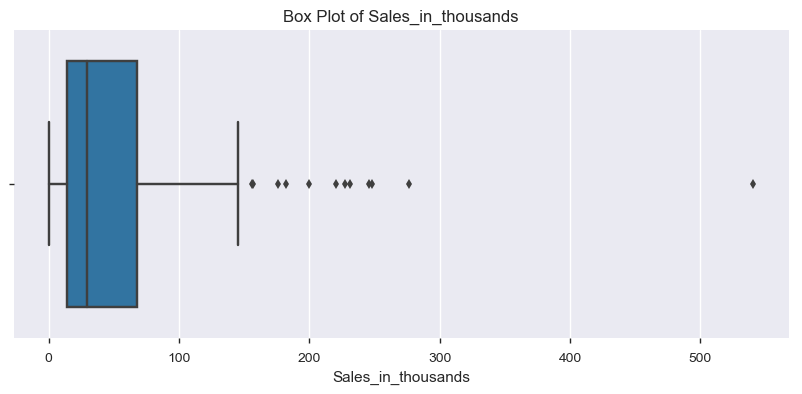

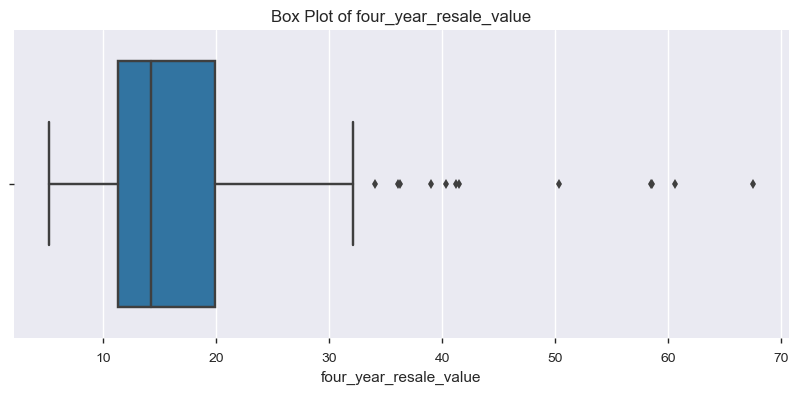

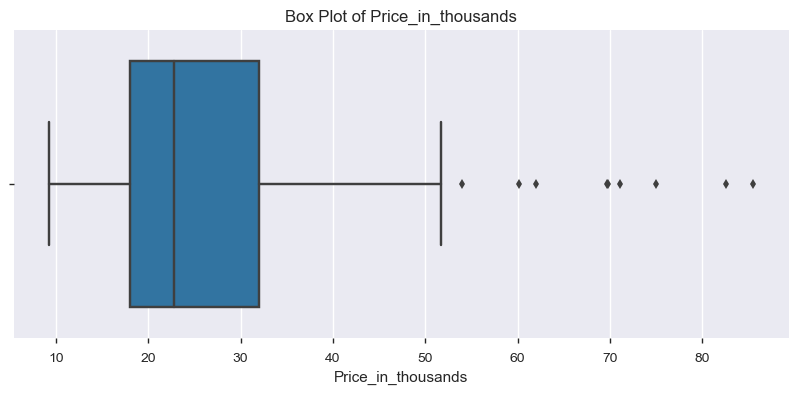

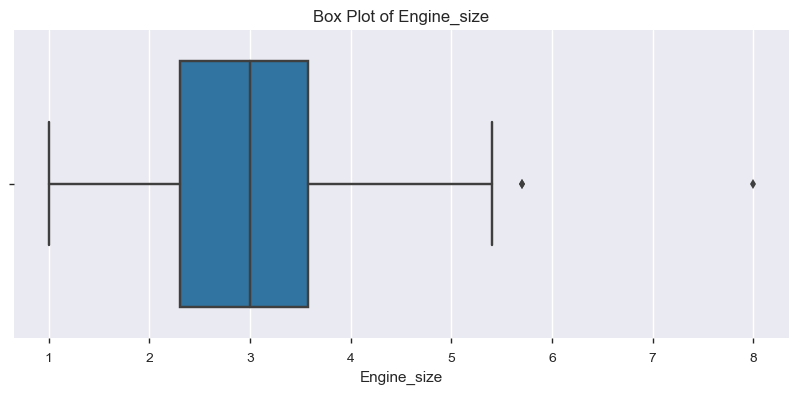

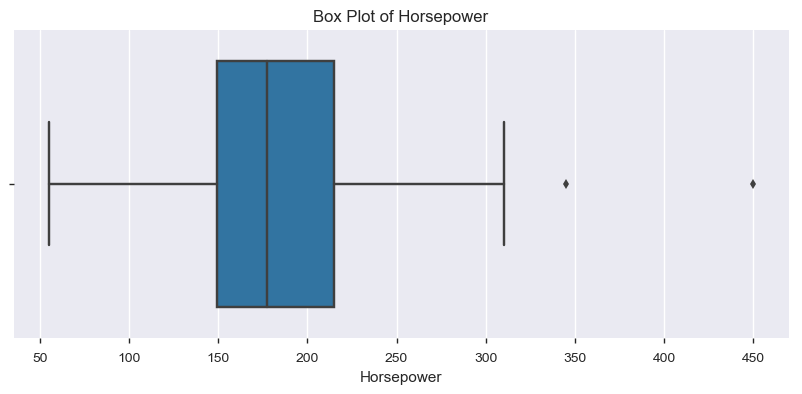

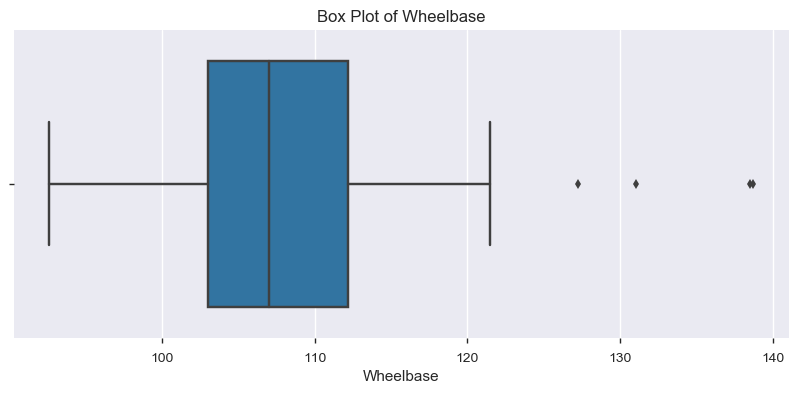

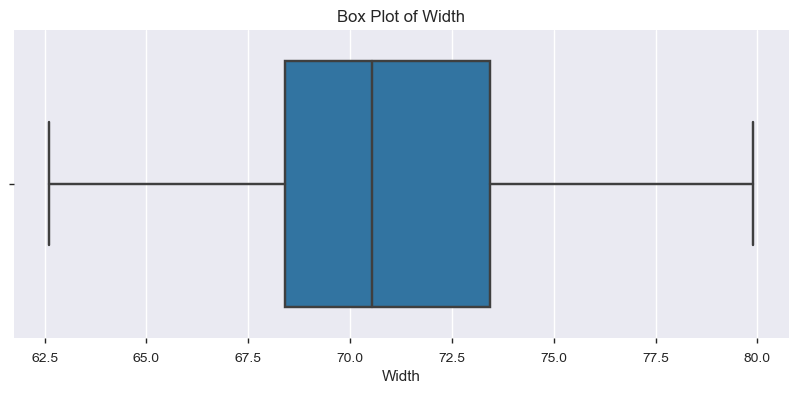

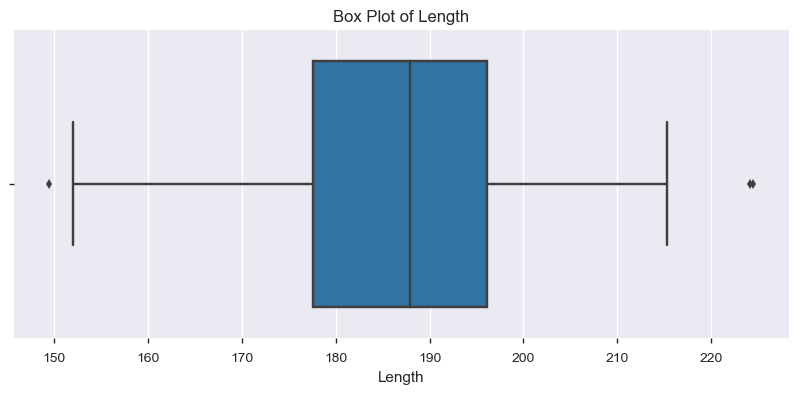

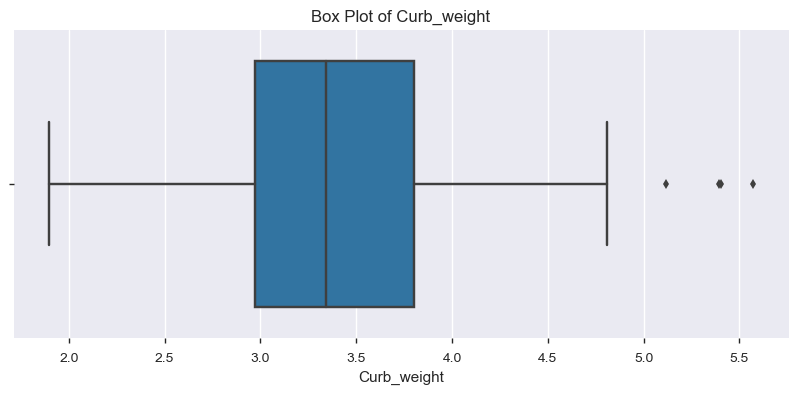

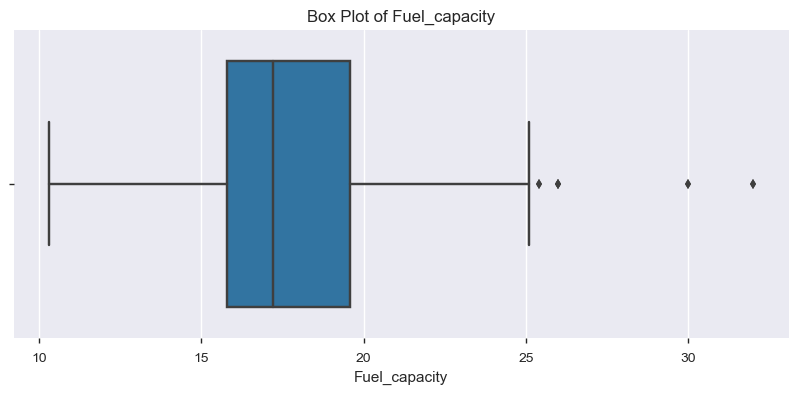

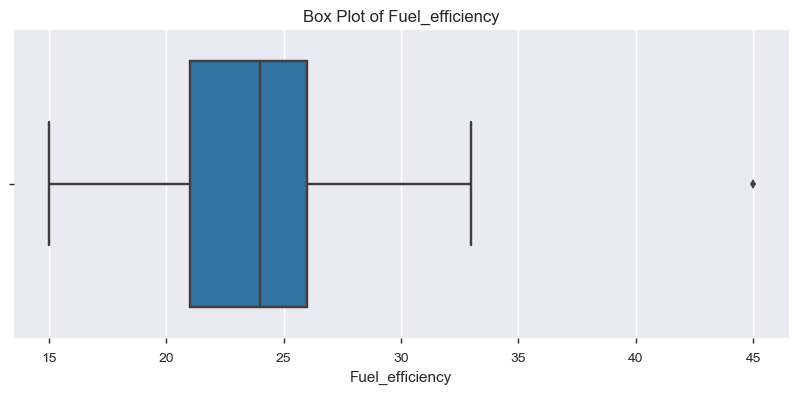

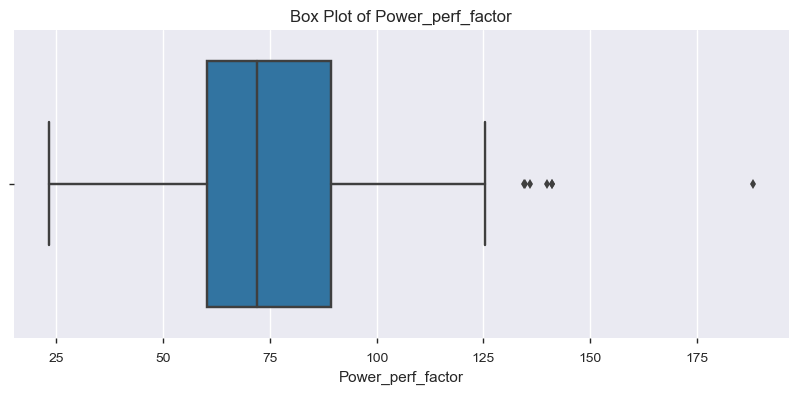

In [14]:
bp = PdfPages('x.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = car_sales_num)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

In [15]:
# Handling the Outliers

def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

car_sales_num=car_sales_num.apply(lambda x: outlier_capping(x))
car_sales_num.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.00000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,46.150732,16.66343,26.396932,3.042067,184.868590,107.285897,71.150000,187.340705,3.369561,17.787420,23.769481,76.496160
std,43.632116,7.41391,11.465862,0.978600,53.007755,6.973438,3.451872,13.411235,0.604659,3.432476,4.002505,23.434697
min,0.110000,5.16000,9.235000,1.000000,55.000000,92.600000,62.600000,149.750000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.26000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.18000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.87500,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,148.719000,32.79750,52.842500,5.487500,313.250000,126.000000,79.900000,223.950000,5.042250,25.237500,33.500000,132.925634


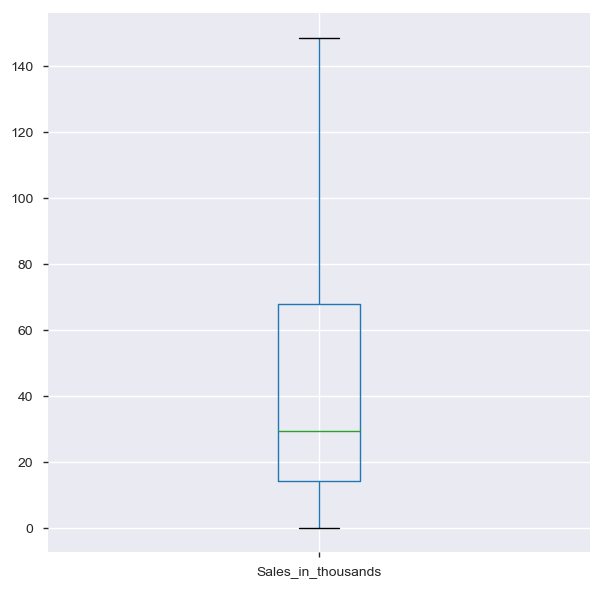

In [16]:
#Creating Box-Plot for Purchase Value
car_sales_num['Sales_in_thousands'].plot(subplots = True, kind = 'box', layout = (1,1), figsize = [7, 7])
plt.show()


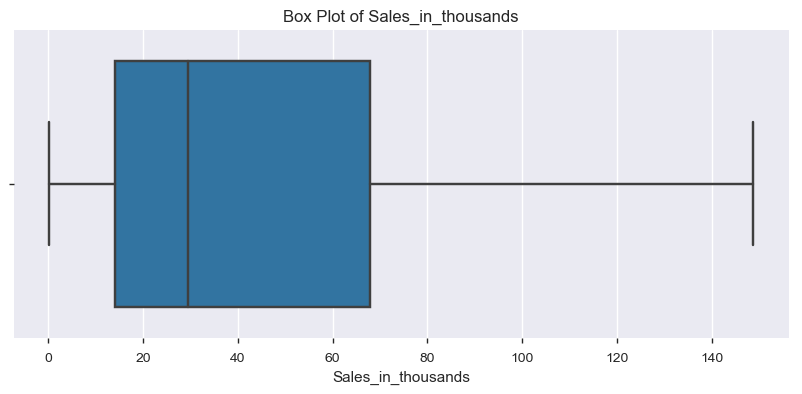

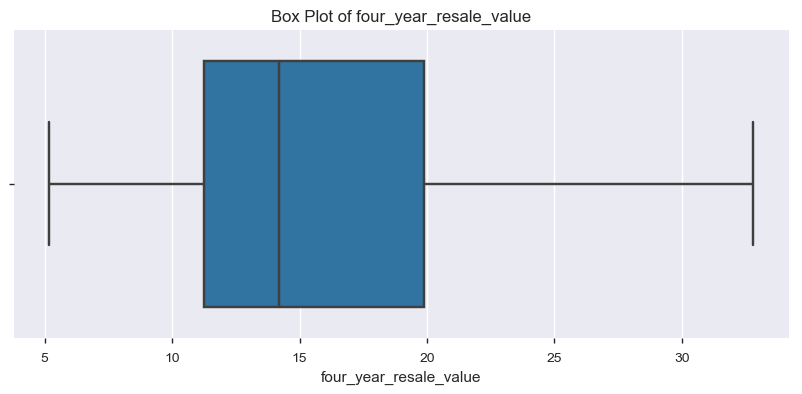

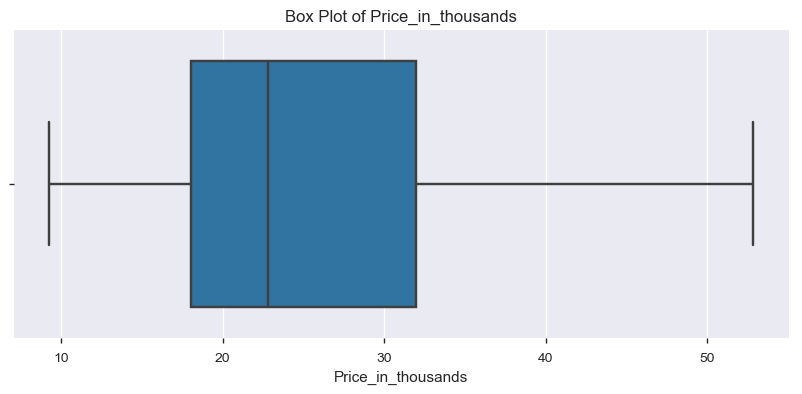

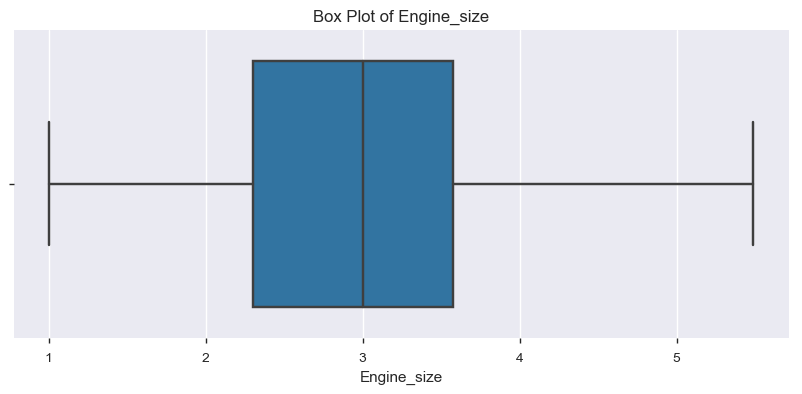

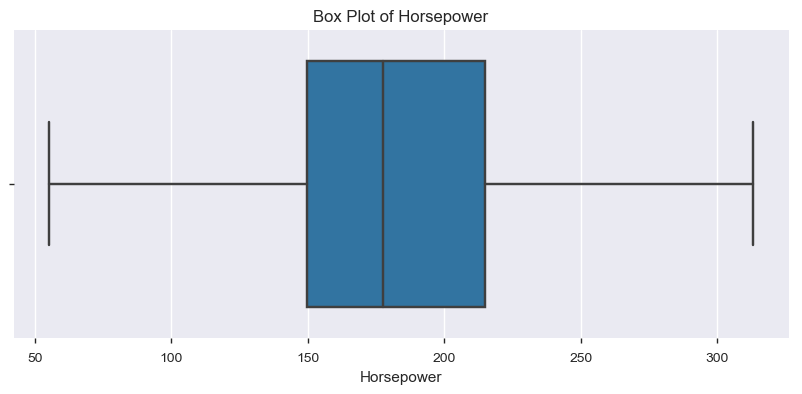

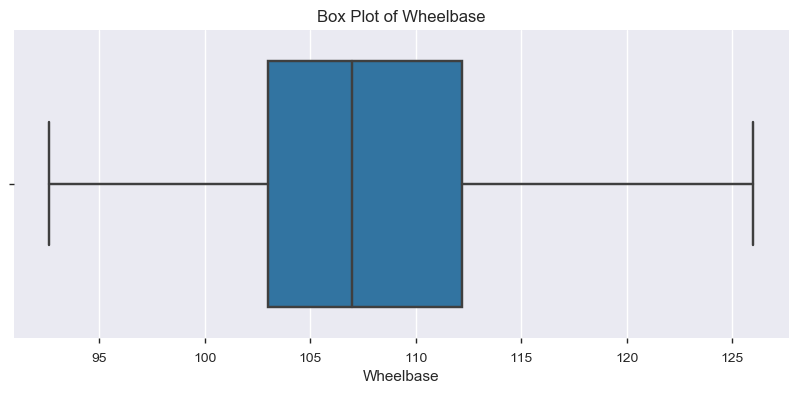

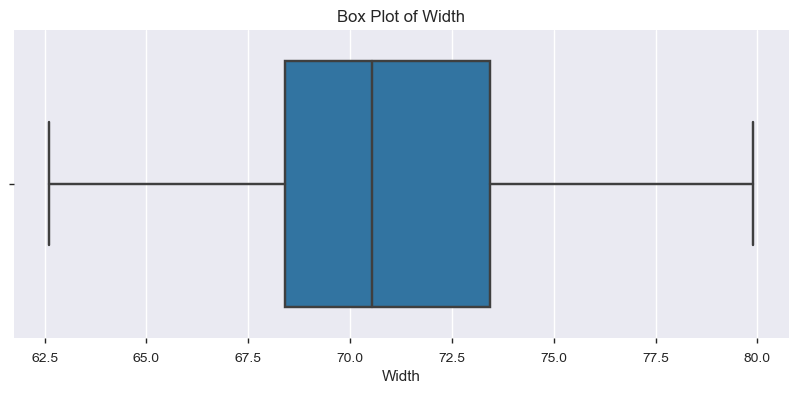

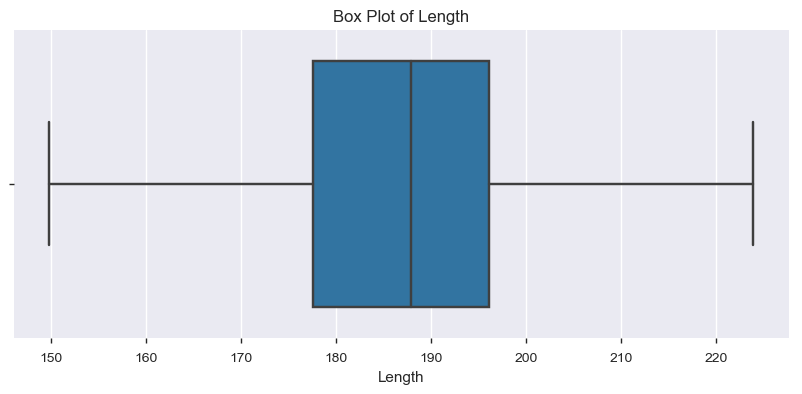

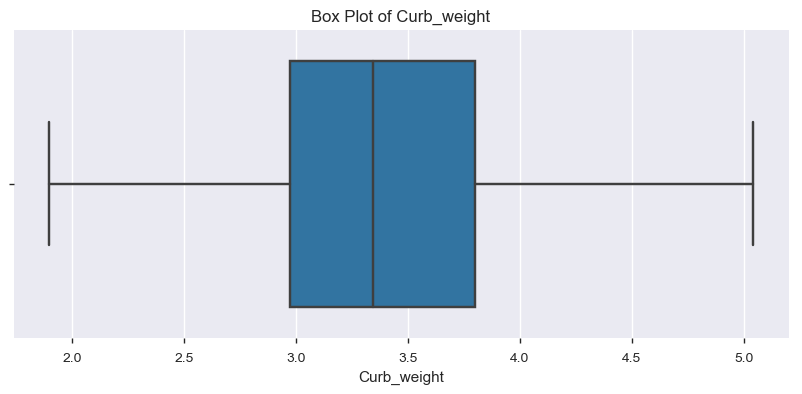

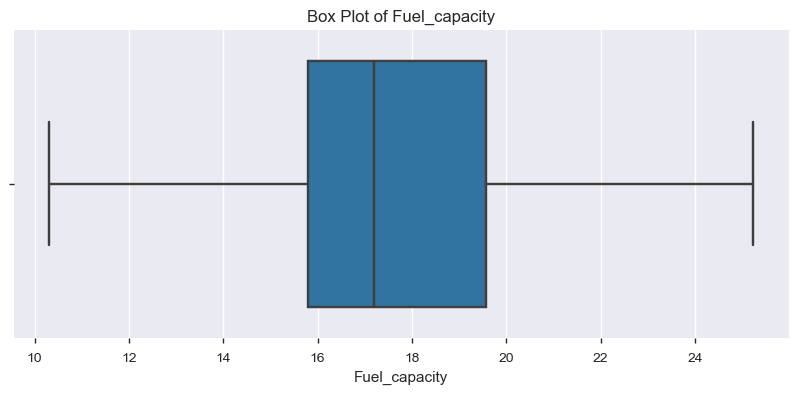

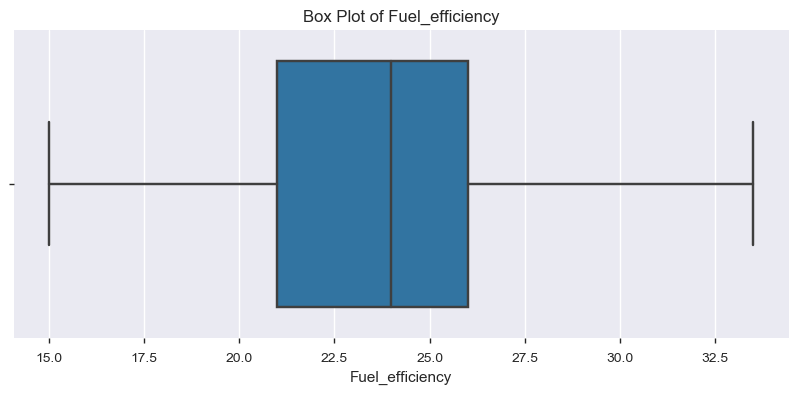

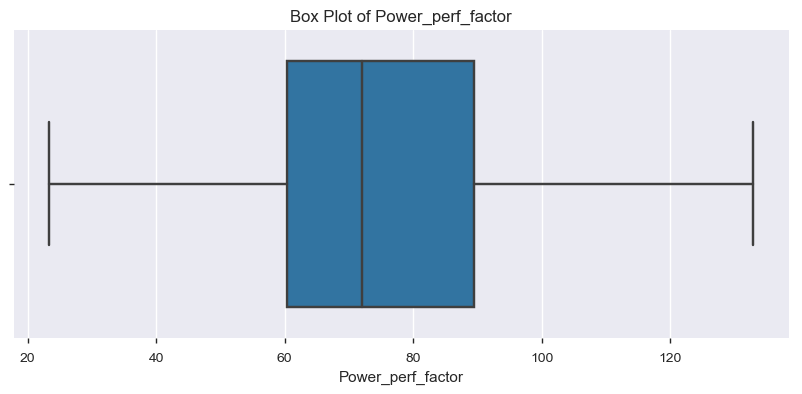

In [17]:
bp = PdfPages('BoxPlots with default Split.pdf')

for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = car_sales_num)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

In [18]:
#Handling missings values - imputing with the mean
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

car_sales_num=car_sales_num.apply(lambda x: Missing_imputation(x))

In [19]:
pd_prof.ProfileReport(car_sales_num)

Number of variables,12
Number of observations,157
Total Missing (%),0.0%
Total size in memory,14.8 KiB
Average record size in memory,96.5 B
Numeric,11
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [20]:
# Creating Dummy variables for Categorical variables

# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )
    
car_sales_cat.head(5)

C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
car_sales_cat.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

In [22]:
#Combining both data

#car_sales=pd.concat(car_sales_num, car_sales_cat)
car_sales_new = pd.concat([car_sales_num, car_sales_cat], axis=1)

car_sales_new.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,26.396932,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


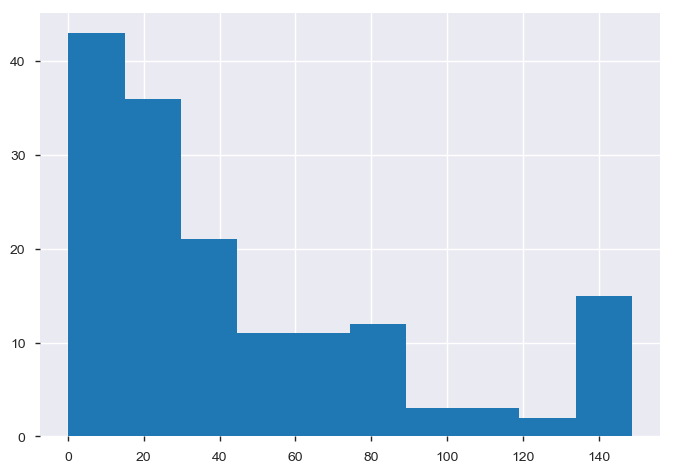

In [23]:
#Checking how the data looks like
car_sales_new.Sales_in_thousands.hist()

C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


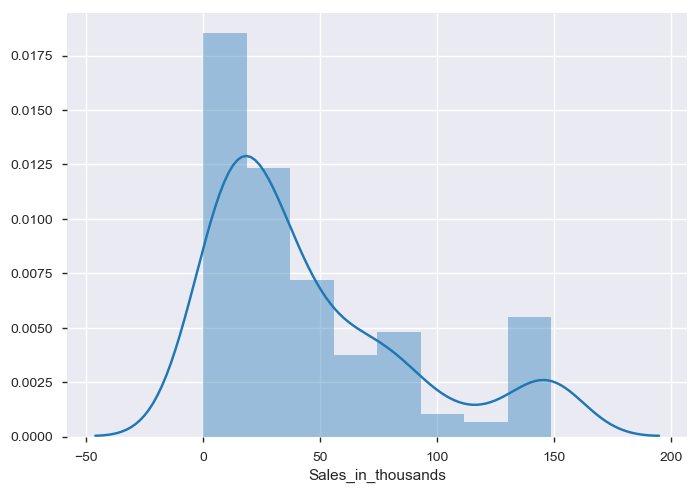

In [24]:
sns.distplot(car_sales_new.Sales_in_thousands)

C:\Users\subhabahap\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


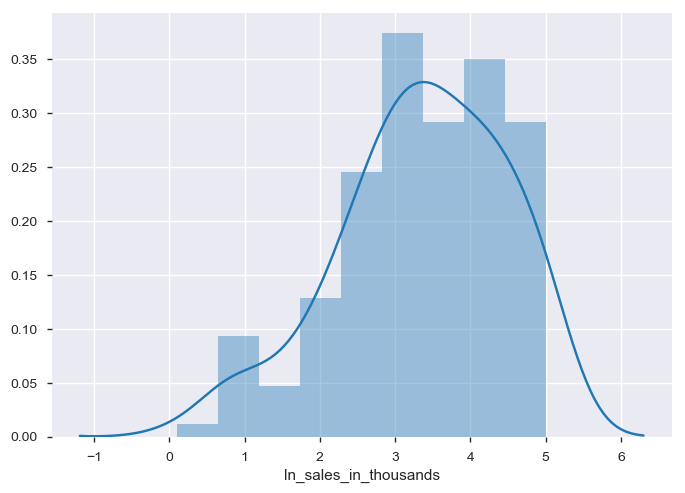

In [25]:
# Making Log Transformation
car_sales_new["ln_sales_in_thousands"]= np.log(car_sales_new["Sales_in_thousands"]+1)
sns.distplot(car_sales_new.ln_sales_in_thousands)

In [26]:
#Dropping the variables
#car_sales_new=car_sales_new.drop(['Sales_in_thousands'],axis=1)

In [27]:
car_sales_new.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_

In [28]:
corrm = car_sales_new.corr()

corrm.to_csv('corrm.csv')

car_sales_new.corr()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
Sales_in_thousands,1.000000,-3.674816e-01,-0.436490,-0.034963,-0.296354,0.221061,0.073455,0.187057,-0.056248,0.018936,...,0.071520,-0.135128,-9.271095e-02,-0.051629,-1.588784e-02,0.142108,-0.051708,-1.536626e-01,-0.231634,0.865127
four_year_resale_value,-0.367482,1.000000e+00,0.807302,0.483413,0.694234,0.095242,0.228763,0.123335,0.429279,0.410720,...,-0.072769,0.347421,-5.877315e-17,-0.108627,-5.877315e-17,-0.005622,-0.059417,-9.524188e-17,0.027406,-0.438284
Price_in_thousands,-0.436490,8.073022e-01,1.000000,0.642995,0.870783,0.204638,0.383159,0.208331,0.595696,0.511974,...,-0.060521,0.278283,3.214044e-02,-0.193669,-5.003452e-02,-0.095854,-0.152693,7.963085e-02,0.013204,-0.549265
Engine_size,-0.034963,4.834129e-01,0.642995,1.000000,0.816359,0.534935,0.711796,0.590313,0.804225,0.718604,...,0.080212,0.017885,-1.042139e-01,-0.190643,-6.332588e-02,-0.106478,-0.220463,-1.521281e-01,-0.281923,-0.111706
Horsepower,-0.296354,6.942340e-01,0.870783,0.816359,1.000000,0.352378,0.552034,0.436131,0.656472,0.570467,...,0.000497,0.231781,-1.589198e-02,-0.224756,-4.285098e-02,-0.113314,-0.242354,-1.022597e-02,-0.016865,-0.388087
Wheelbase,0.221061,9.524249e-02,0.204638,0.534935,0.352378,1.000000,0.691255,0.844465,0.684088,0.674229,...,0.053628,-0.278369,-4.567214e-02,-0.084964,-9.567398e-02,-0.094800,-0.212485,-8.686014e-02,-0.372433,0.246927
Width,0.073455,2.287630e-01,0.383159,0.711796,0.552034,0.691255,1.000000,0.710212,0.722443,0.639475,...,0.042620,-0.059006,-7.120605e-02,-0.196185,-1.076371e-01,-0.112242,-0.183074,-9.202140e-02,-0.243941,0.035385
Length,0.187057,1.233346e-01,0.208331,0.590313,0.436131,0.844465,0.710212,1.000000,0.639138,0.584699,...,0.094381,-0.146714,-1.398604e-02,-0.060169,-5.831298e-02,-0.101507,-0.298044,-5.795171e-02,-0.133487,0.200568
Curb_weight,-0.056248,4.292787e-01,0.595696,0.804225,0.656472,0.684088,0.722443,0.639138,1.000000,0.880853,...,0.011075,-0.095066,-4.449227e-02,-0.224832,-1.888508e-02,-0.072145,-0.163345,-2.825833e-02,-0.515979,-0.053980
Fuel_capacity,0.018936,4.107200e-01,0.511974,0.718604,0.570467,0.674229,0.639475,0.584699,0.880853,1.000000,...,0.007554,-0.032224,-2.911627e-03,-0.281179,-4.620974e-02,-0.002806,-0.180451,2.683513e-03,-0.589449,-0.029685


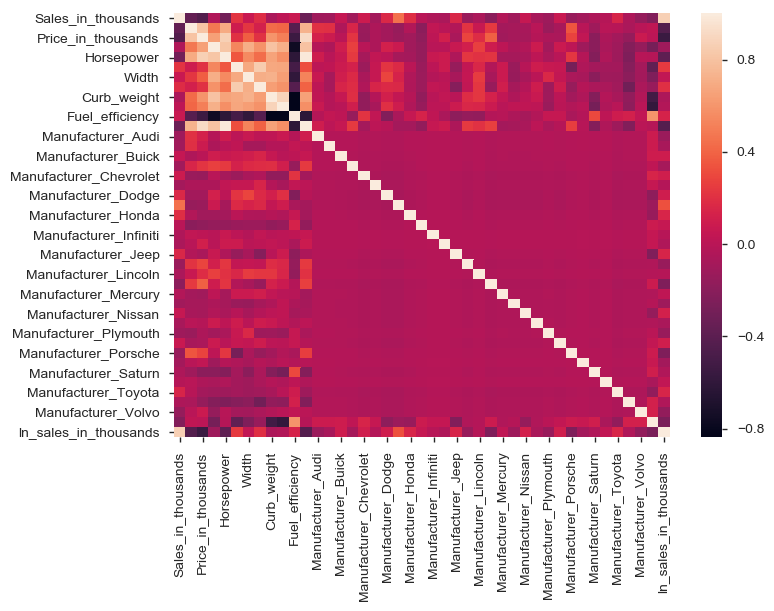

In [29]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(car_sales_new.corr())

In [30]:
#Splitting the data

feature_columns = car_sales_new.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] )
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [31]:
# Splitting the Data into Train and Test Set

from sklearn.model_selection import train_test_split
train ,test = train_test_split(car_sales_new,test_size=0.3,random_state = 123 ) 

In [32]:
len(test)

48

In [33]:
len(train)

109

In [46]:
# Building Regression Model

import statsmodels.formula.api as smf

lm=smf.ols('Sales_in_thousands~Price_in_thousands+four_year_resale_value+Engine_size+Curb_weight+Wheelbase+Width+Length+Horsepower+Fuel_capacity+Fuel_efficiency+Vehicle_type_Passenger', train).fit()

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Sales_in_thousands   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     7.208
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           7.56e-09
Time:                        14:57:27   Log-Likelihood:                -538.56
No. Observations:                 109   AIC:                             1101.
Df Residuals:                      97   BIC:                             1133.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -274.7548    122.068     -2.251      0.027    -517.026     -32.483
Price_in_thousands        -1.2503      0.915     -1.366      0.175      -3.067       0.566
four_year_resale_value     0.1924      0.928      0.207      0.836      -1.650       2.035
Engine_size               18.6011      8.835      2.105      0.038       1.067      36.135
Curb_weight              -33.7603     16.629     -2.030      0.045     -66.765      -0.755
Wheelbase                  1.0024      1.132      0.885      0.378      -1.245       3.250
Width                      3.2483      1.868      1.738      0.085      -0.460       6.957
Length                     0.3467      0.658      0.527      0.599      -0.959       1.652
Horsepower                -0.2598      0.195     -1.331      0.186      -0.647       0.128
Fuel_capacity              1.0791      2.519      0.428      0.669      -3.920       6.078
Fuel_efficiency            2.7512      2.072      1.327      0.187      -1.362       6.864
Vehicle_type_Passenger   -36.6708     15.334     -2.391      0.019     -67.105      -6.237
==============================================================================
Omnibus:                        7.693   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.553
Skew:                           0.638   Prob(JB):                       0.0229
Kurtosis:                       3.184   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
all_columns = "+".join(train.columns.difference( ['ln_sales_in_thousands', 'Sales_in_thousands'] ))

print(all_columns)

Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_Mercedes_B+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [37]:
my_formula = "ln_sales_in_thousands~" + all_columns

print(my_formula)

ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_Mercedes_B+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value


In [48]:
# Refitting the Model with all feature variables

lm=smf.ols(formula=my_formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.767
Model:                               OLS   Adj. R-squared:                  0.636
Method:                    Least Squares   F-statistic:                     5.834
Date:                   Fri, 21 Sep 2018   Prob (F-statistic):           1.11e-10
Time:                           15:06:06   Log-Likelihood:                -89.557
No. Observations:                    109   AIC:                             259.1
Df Residuals:                         69   BIC:                             366.8
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.2864      3.212     -2.268      0.026     -13.695      -0.878
Curb_weight                 0.9416      0.411      2.292      0.025       0.122       1.761
Engine_size                 0.2251      0.244      0.922      0.360      -0.262       0.712
Fuel_capacity              -0.1730      0.066     -2.628      0.011      -0.304      -0.042
Fuel_efficiency             0.1408      0.055      2.579      0.012       0.032       0.250
Horsepower                 -0.0003      0.019     -0.015      0.988      -0.038       0.038
Length                     -0.0043      0.019     -0.224      0.824      -0.043       0.034
Manufacturer_Audi          -0.0607      0.928     -0.065      0.948      -1.912       1.791
Manufacturer_BMW            0.4213      0.873      0.483      0.631      -1.320       2.163
Manufacturer_Buick          0.8378      0.661      1.267      0.209      -0.481       2.157
Manufacturer_Cadillac       0.7698      0.612      1.257      0.213      -0.452       1.992
Manufacturer_Chevrolet      0.4779      0.652      0.733      0.466      -0.822       1.778
Manufacturer_Chrysler      -0.0438      0.670     -0.065      0.948      -1.381       1.294
Manufacturer_Dodge          1.1896      0.660      1.802      0.076      -0.127       2.507
Manufacturer_Ford           1.4949      0.623      2.398      0.019       0.251       2.738
Manufacturer_Honda          1.5142      0.758      1.999      0.050       0.003       3.026
Manufacturer_Hyundai        0.9547      0.789      1.210      0.230      -0.619       2.529
Manufacturer_Infiniti    2.202e-15   1.29e-15      1.706      0.092   -3.72e-16    4.78e-15
Manufacturer_Jaguar         0.9619      0.929      1.035      0.304      -0.892       2.815
Manufacturer_Jeep           2.6344      0.833      3.164      0.002       0.973       4.296
Manufacturer_Lexus          1.0432      0.620      1.682      0.097      -0.194       2.281
Manufacturer_Lincoln        0.9164      0.683      1.341      0.184      -0.447       2.280
Manufacturer_Mercedes_B     0.5625      0.605      0.931      0.355      -0.643       1.769
Manufacturer_Mercury        0.4109      0.716      0.574      0.568      -1.018       1.840
Manufacturer_Mitsubishi     0.5887      0.657      0.896      0.373      -0.722       1.900
Manufacturer_Nissan         1.6028      0.649      2.471      0.016       0.309       2.897
Manufacturer_Oldsmobile     0.1579      0.620      0.255      0.800      -1.079       1.395
Manufacturer_Plymouth      -1.1497      1.261     -0.912      0.365      -3.666       1.366
Manufacturer_Pontiac        0.7290      0.633      1.152      0.253      -0.533       1.991
Manufacturer_Porsche        1.7391      0.911      1.908      0.061      -0.079       3.557
Manufacturer_S

In [50]:
pred = lm.predict(test)
pred

24     1.773050
23     3.046147
138    3.979041
87     3.952023
134    3.441858
86     3.660016
88     3.636532
142    3.788945
116    2.333555
108    3.456986
137    3.812544
53     4.472858
95     1.066595
110    3.594475
8      2.853053
65     2.490521
42     4.779852
74     2.072219
132    3.192977
41     3.031381
13     4.136435
104    4.786253
31     3.185822
33     3.026652
36     3.569621
61     5.928863
72     2.334434
59     4.717770
20     3.885465
37     3.964310
28     2.347298
60     3.761508
125    1.171558
7      3.211368
127    1.500333
4      2.452865
62     4.110109
130    3.473391
29     2.616750
139    4.389923
0      2.820777
121    4.055121
115    2.074153
101    4.868144
128    1.657755
114    2.493620
5      1.864591
16     2.893510
dtype: float64

In [40]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test.ln_sales_in_thousands, pred))
print('MSE:', metrics.mean_squared_error(test.ln_sales_in_thousands, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_sales_in_thousands, pred)))
print ('R-Squre:', metrics.r2_score(test.ln_sales_in_thousands, pred))

MAE: 0.7431548387267742
MSE: 0.8016657949589815
RMSE: 0.8953579144448222
R-Squre: 0.24248009247366697


In [41]:
pred_train = lm.predict(train)
print('MAE:', metrics.mean_absolute_error(train.ln_sales_in_thousands, pred_train))
print('MSE:', metrics.mean_squared_error(train.ln_sales_in_thousands, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train.ln_sales_in_thousands, pred_train)))
print ('R-Squre:', metrics.r2_score(train.ln_sales_in_thousands, pred_train))

MAE: 0.4390054349419098
MSE: 0.30281555497479073
RMSE: 0.5502867933857678
R-Squre: 0.7673195243663147
